# 1. Importing libraries and preparing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

boston = load_boston()                     ## Loading the dataset
bos = pd.DataFrame(boston.data)            ## Making a dataframe of the dataset


In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
bos.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.columns=boston.feature_names

In [5]:
bos['Price']=boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 2. Creating some functions for convinience

## 2a. Creating a function to get the correlated features with the target given a desired threshold correlation value:

In [7]:
def get_corr_features(var_name,data,thresh):
    feature = []
    corr_value = []
    corr_matrix=data.corr()
    for i in corr_matrix.index:
        if i!=var_name:
            if(abs(corr_matrix[i][var_name])>thresh):
                feature.append(i)
                corr_value.append(corr_matrix[i][var_name])
    return(pd.DataFrame(corr_value,index=feature,columns=['Correlation value with '+var_name]))

## 2b. Creating a function to fit the Linear Regression model to the data:

In [8]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [9]:
def accuracy_scores(X,y):
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    
    model=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    
    print('R^2 for train data:',metrics.r2_score(y_train,model.predict(X_train)))
    print('Adjusted R^2 for train data:',adj_r2(X_train,y_train,model) )
    print('R^2 for test data:', metrics.r2_score(y_test,model.predict(X_test)))
    print('Adjusted R^2 for test data:',adj_r2(X_test,y_test,model) )
    print('MAE for test data:', metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print('MSE for test data:', metrics.mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE for test data:', np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))


# 3. Fitting the model to data to observe the accuracy measure for the base model

In [10]:
X=bos.drop(['Price'],1)

In [11]:
y=bos['Price']

In [12]:
accuracy_scores(X,y)

R^2 for train data: 0.7508856358979673
Adjusted R^2 for train data: 0.7425818237612329
R^2 for test data: 0.6687594935356294
Adjusted R^2 for test data: 0.6198262368988473
MAE for test data: 3.1890919658878745
MSE for test data: 24.29111947497371
RMSE for test data: 4.928602182665355


### Scaling the independent features using StandrdScaler

In [13]:
from sklearn.preprocessing import StandardScaler
sds=StandardScaler()
sds.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_scaled=sds.fit_transform(X)

In [15]:
accuracy_scores(X_scaled,y)

R^2 for train data: 0.7508856358979673
Adjusted R^2 for train data: 0.7425818237612329
R^2 for test data: 0.6687594935356322
Adjusted R^2 for test data: 0.6198262368988505
MAE for test data: 3.1890919658878496
MSE for test data: 24.291119474973502
RMSE for test data: 4.928602182665335


### These are the performance metrics for the our base model. Now we will try to improve these metrics.

# 4. Exploratory Data Analysis

In [16]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

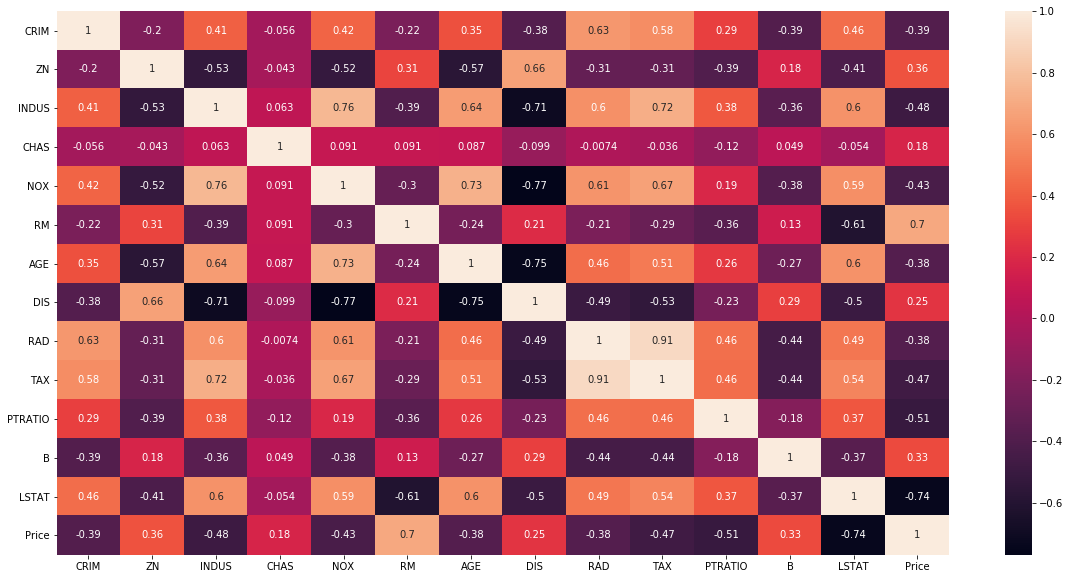

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(bos.corr(),annot=True)
plt.show()

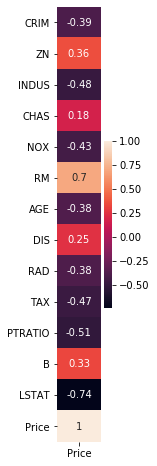

In [18]:
plt.figure(figsize=(1,8))
sns.heatmap(pd.DataFrame(bos.corr()['Price']),annot=True)
plt.show()

### Checking for features having strong correlation with the target variable

In [19]:
get_corr_features('Price',bos,0.5) ## Passing 0.5 as the threshold value for correlation

,Correlation value with Price
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663


#### Fitting the model including these features only

In [20]:
X=bos[get_corr_features('Price',bos,0.5).index]
y=bos['Price']

In [21]:
accuracy_scores(X,y)

R^2 for train data: 0.6864566575056517
Adjusted R^2 for train data: 0.6841050824369441
R^2 for test data: 0.6302528487272827
Adjusted R^2 for test data: 0.6189340583821995
MAE for test data: 3.3325380783240965
MSE for test data: 27.114957415580584
RMSE for test data: 5.207202455789536


### We observed that the value of R^2 decreased to 0.63 from 0.67(R^2 for the base model). 

### Lets include some more features in our model

In [22]:
## Getting features that have a correlation coefficient of 0.4 or greater with the target variable
get_corr_features('Price',bos,0.4)

,Correlation value with Price
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663


In [23]:
X=bos[get_corr_features('Price',bos,0.4).index]
y=bos['Price']

In [24]:
accuracy_scores(X,y)

R^2 for train data: 0.6906984575653774
Adjusted R^2 for train data: 0.6860238750600682
R^2 for test data: 0.6209548378098438
Adjusted R^2 for test data: 0.5970151433557287
MAE for test data: 3.3543379192925546
MSE for test data: 27.796815732022356
RMSE for test data: 5.272268556515531


In [25]:
## Getting features that have a correlation coefficient of 0.3 or greater with the target variable
get_corr_features('Price',bos,0.3)

,Correlation value with Price
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
AGE,-0.376955
RAD,-0.381626
TAX,-0.468536
PTRATIO,-0.507787
B,0.333461


In [26]:
X=bos[get_corr_features('Price',bos,0.3).index]
y=bos['Price']

In [27]:
accuracy_scores(X,y)

R^2 for train data: 0.7186607760274348
Adjusted R^2 for train data: 0.7107660529057558
R^2 for test data: 0.6211363896861286
Adjusted R^2 for test data: 0.5748308373144333
MAE for test data: 3.335698905113307
MSE for test data: 27.783501846094538
RMSE for test data: 5.2710057717758705


In [28]:
## Getting features that have a correlation coefficient of 0.2 or greater with the target variable
X=bos[get_corr_features('Price',bos,0.2).index]
y=bos['Price']
accuracy_scores(X,y)

R^2 for train data: 0.7454634121900364
Adjusted R^2 for train data: 0.7376515476025183
R^2 for test data: 0.6640648675861145
Adjusted R^2 for test data: 0.6187702429909838
MAE for test data: 3.2372423618144848
MSE for test data: 24.635394156374264
RMSE for test data: 4.963405499893623


### We have tried various values of correlation coefficient for feature selection and the best model we got is with using all the features. 

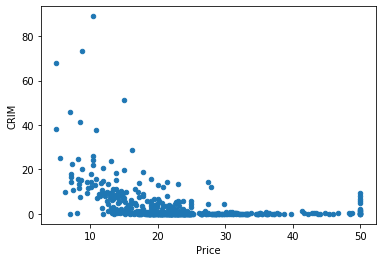

In [29]:
bos.plot(x='Price',y='CRIM',kind='scatter')
plt.show()

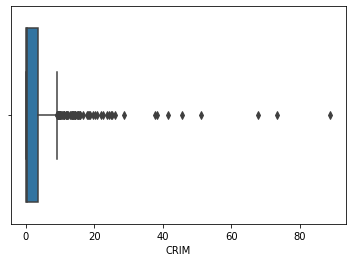

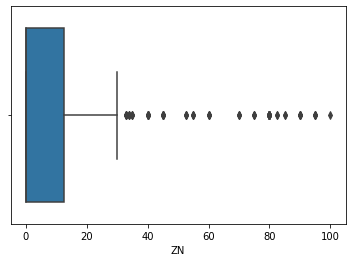

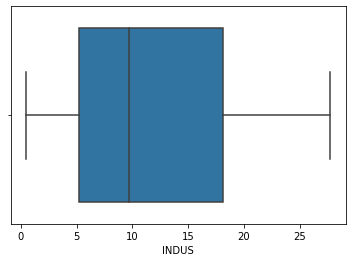

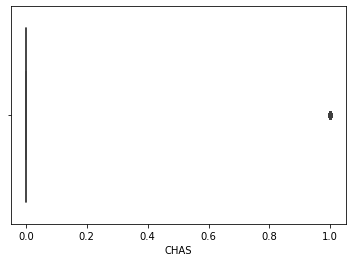

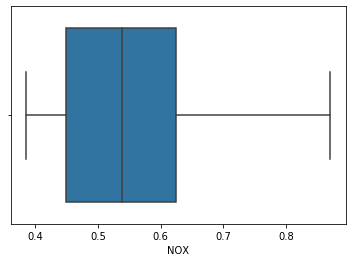

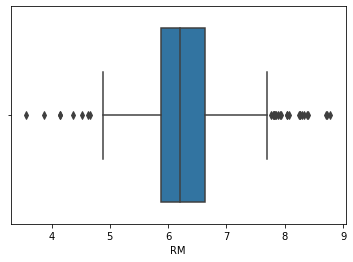

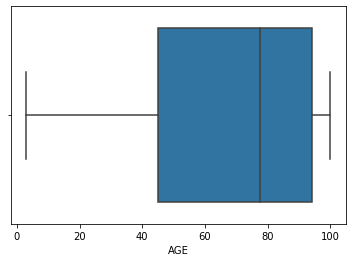

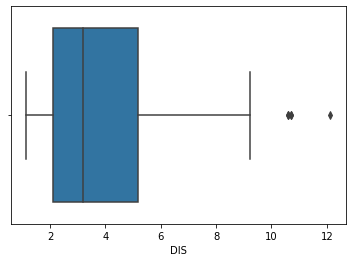

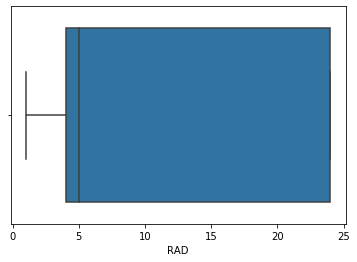

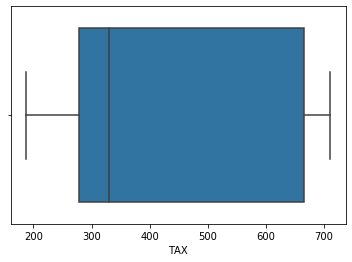

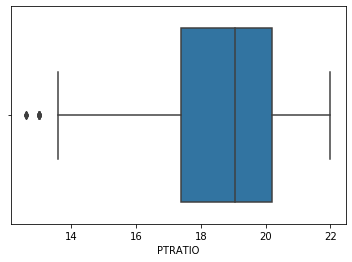

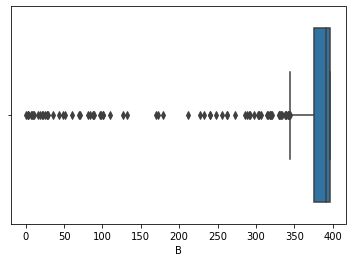

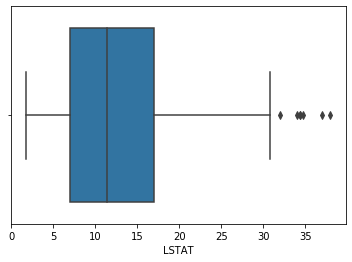

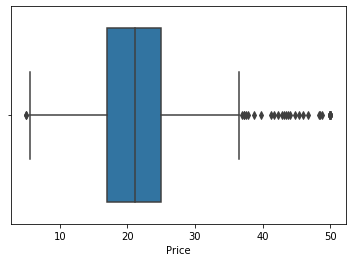

In [30]:
for i in bos.columns:
    sns.boxplot(x=bos[i])
    plt.show()

## Outlier detection using Z scores

In [31]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bos))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [32]:
bos_Z=bos[(z <3).all(axis=1)]

In [33]:
bos_Z.shape

(415, 14)

In [34]:
X_z=bos_Z.drop(['Price'],1)
y_z=bos_Z['Price']

In [35]:
accuracy_scores(X_z,y_z)

R^2 for train data: 0.7361459356698856
Adjusted R^2 for train data: 0.7253594487633088
R^2 for test data: 0.7761172997388464
Adjusted R^2 for test data: 0.7339365011389188
MAE for test data: 2.4944873675762547
MSE for test data: 10.621445730673
RMSE for test data: 3.2590559569717428


## After removing the outliers(using Z-score technique), accuracy improved. Adjusted R_squared for test data has improved from 61.98% to 73.39%

In [36]:
bos_Z.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.235368,0.496014,NaN,0.543941,-0.256220,0.419317,-0.458391,0.797353,0.731316,0.322394,-0.306526,0.543535,-0.418531
ZN,-0.235368,1.000000,-0.482283,NaN,-0.484217,0.285338,-0.507627,0.601974,-0.265506,-0.277640,-0.400607,0.141924,-0.377615,0.306172
INDUS,0.496014,-0.482283,1.000000,NaN,0.734989,-0.395686,0.599328,-0.675009,0.548687,0.699422,0.361641,-0.316034,0.601658,-0.486369
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.543941,-0.484217,0.734989,NaN,1.000000,-0.311671,0.719230,-0.772557,0.579036,0.644144,0.160670,-0.356332,0.604435,-0.417222
RM,-0.256220,0.285338,-0.395686,NaN,-0.311671,1.000000,-0.219932,0.195682,-0.171454,-0.269194,-0.309908,0.146503,-0.630955,0.734041
AGE,0.419317,-0.507627,0.599328,NaN,0.719230,-0.219932,1.000000,-0.719924,0.403405,0.474359,0.242456,-0.242556,0.603143,-0.384446
DIS,-0.458391,0.601974,-0.675009,NaN,-0.772557,0.195682,-0.719924,1.000000,-0.450038,-0.514232,-0.227957,0.250530,-0.478924,0.234420
RAD,0.797353,-0.265506,0.548687,NaN,0.579036,-0.171454,0.403405,-0.450038,1.000000,0.892011,0.408510,-0.285008,0.448428,-0.347297
TAX,0.731316,-0.277640,0.699422,NaN,0.644144,-0.269194,0.474359,-0.514232,0.892011,1.000000,0.404856,-0.314385,0.526334,-0.453723


In [37]:
bos_Z["RM_LSTAT"]=pd.DataFrame((bos_Z['RM']*bos_Z['LSTAT']))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
bos_Z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,RM_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,32.74350
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,58.68794
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,28.95555
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,20.57412
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,38.09351


In [39]:
X_z=bos_Z.drop(['Price'],1)
y_z=bos_Z['Price']
accuracy_scores(X_z,y_z)

R^2 for train data: 0.7874121488281647
Adjusted R^2 for train data: 0.778023410921522
R^2 for test data: 0.8267226154453826
Adjusted R^2 for test data: 0.7910478598017849
MAE for test data: 2.1817045501014274
MSE for test data: 8.220627740566723
RMSE for test data: 2.867163710109125


## Now, we are getting better accuracy. Adjusted R_squared for test data has improved from 73.39% to 79.10% that is a decent accuracy.